In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import os 
os.getcwd()

'/home/selezov_su/notebooks/Promics/Panoram'

In [3]:
bgcolor = '#fff0f3' # "#edf2fb", "fff0f3" ["feeafa"]
plt.rcdefaults()
plt.rcParams['axes.facecolor'] = bgcolor
plt.rcParams['savefig.facecolor'] = "edf2fb"

In [4]:
data = pd.read_csv("Data/raw_human.csv", index_col=0, header=[0, 1, 2])
data

Condition   Healthy                                                       \
Acuteness   Healthy                                                        
Sample      iBAQ H1    iBAQ H10    iBAQ H11 iBAQ H12 iBAQ H2     iBAQ H3   
Protein IDs                                                                
A0A0C4DH55      0.0         0.0         0.0      0.0     0.0         0.0   
A0A075B6I0      0.0         0.0         0.0      0.0     0.0         0.0   
A0A075B6J9      0.0         0.0         0.0      0.0     0.0         0.0   
A0A075B6K2      0.0         0.0         0.0      0.0     0.0         0.0   
A0A075B6K4      0.0  31833000.0  29557000.0      0.0     0.0  84526000.0   
...             ...         ...         ...      ...     ...         ...   
Q9Y490          0.0         0.0         0.0      0.0     0.0         0.0   
Q9Y5Z4          0.0         0.0         0.0      0.0     0.0   3898200.0   
Q9Y6D9          0.0         0.0         0.0      0.0     0.0         0.0   
Q9Y6N5          0.0         0.0         0.0      0.0     0.0         0.0   
Q9Y6R7          0.0         0.0         0.0      0.0     0.0   3430600.0   

Condition                                                ... Pneumonia  \
Acuteness                                                ...      Mild   
Sample          iBAQ H4     iBAQ H5     iBAQ H6 iBAQ H7  ...  iBAQ P11   
Protein IDs                                              ...             
A0A0C4DH55          0.0         0.0         0.0     0.0  ...       0.0   
A0A075B6I0          0.0         0.0         0.0     0.0  ...       0.0   
A0A075B6J9          0.0         0.0         0.0     0.0  ...       0.0   
A0A075B6K2          0.0         0.0         0.0     0.0  ...       0.0   
A0A075B6K4   35434000.0  26509000.0  19931000.0     0.0  ...       0.0   
...                 ...         ...         ...     ...  ...       ...   
Q9Y490              0.0    152870.0         0.0     0.0  ...       0.0   
Q9Y5Z4              0.0   2923800.0   5112500.0     0.0  ...       0.0   
Q9Y6D9              0.0         0.0         0.0     0.0  ...       0.0   
Q9Y6N5              0.0         0.0         0.0     0.0  ...       0.0   
Q9Y6R7              0.0         0.0         0.0     0.0  ...       0.0   

Condition                                                               \
Acuteness                Severe               Mild      Severe           
Sample      iBAQ P12    iBAQ P2    iBAQ P3 iBAQ P4     iBAQ P5 iBAQ P6   
Protein IDs                                                              
A0A0C4DH55       0.0        0.0        0.0     0.0         0.0     0.0   
A0A075B6I0       0.0        0.0        0.0     0.0  18217000.0     0.0   
A0A075B6J9       0.0        0.0        0.0     0.0  56710000.0     0.0   
A0A075B6K2       0.0        0.0        0.0     0.0         0.0     0.0   
A0A075B6K4       0.0        0.0        0.0     0.0  69123000.0     0.0   
...              ...        ...        ...     ...         ...     ...   
Q9Y490           0.0        0.0        0.0     0.0         0.0     0.0   
Q9Y5Z4           0.0  2361200.0        0.0     0.0         0.0     0.0   
Q9Y6D9           0.0        0.0        0.0     0.0         0.0     0.0   
Q9Y6N5           0.0        0.0  1279000.0     0.0         0.0     0.0   
Q9Y6R7           0.0        0.0        0.0     0.0   5626600.0     0.0   

Condition                                  
Acuteness        Mild      Severe          
Sample        iBAQ P7     iBAQ P8 iBAQ P9  
Protein IDs                                
A0A0C4DH55        0.0         0.0     0.0  
A0A075B6I0        0.0         0.0     0.0  
A0A075B6J9        0.0         0.0     0.0  
A0A075B6K2        0.0         0.0     0.0  
A0A075B6K4        0.0  21972000.0     0.0  
...               ...         ...     ...  
Q9Y490            0.0         0.0     0.0  
Q9Y5Z4       887990.0   2288300.0     0.0  
Q9Y6D9            0.0         0.0     0.0  
Q9Y6N5            0.0         0.0     0.0  
Q9Y6R7       205120.0

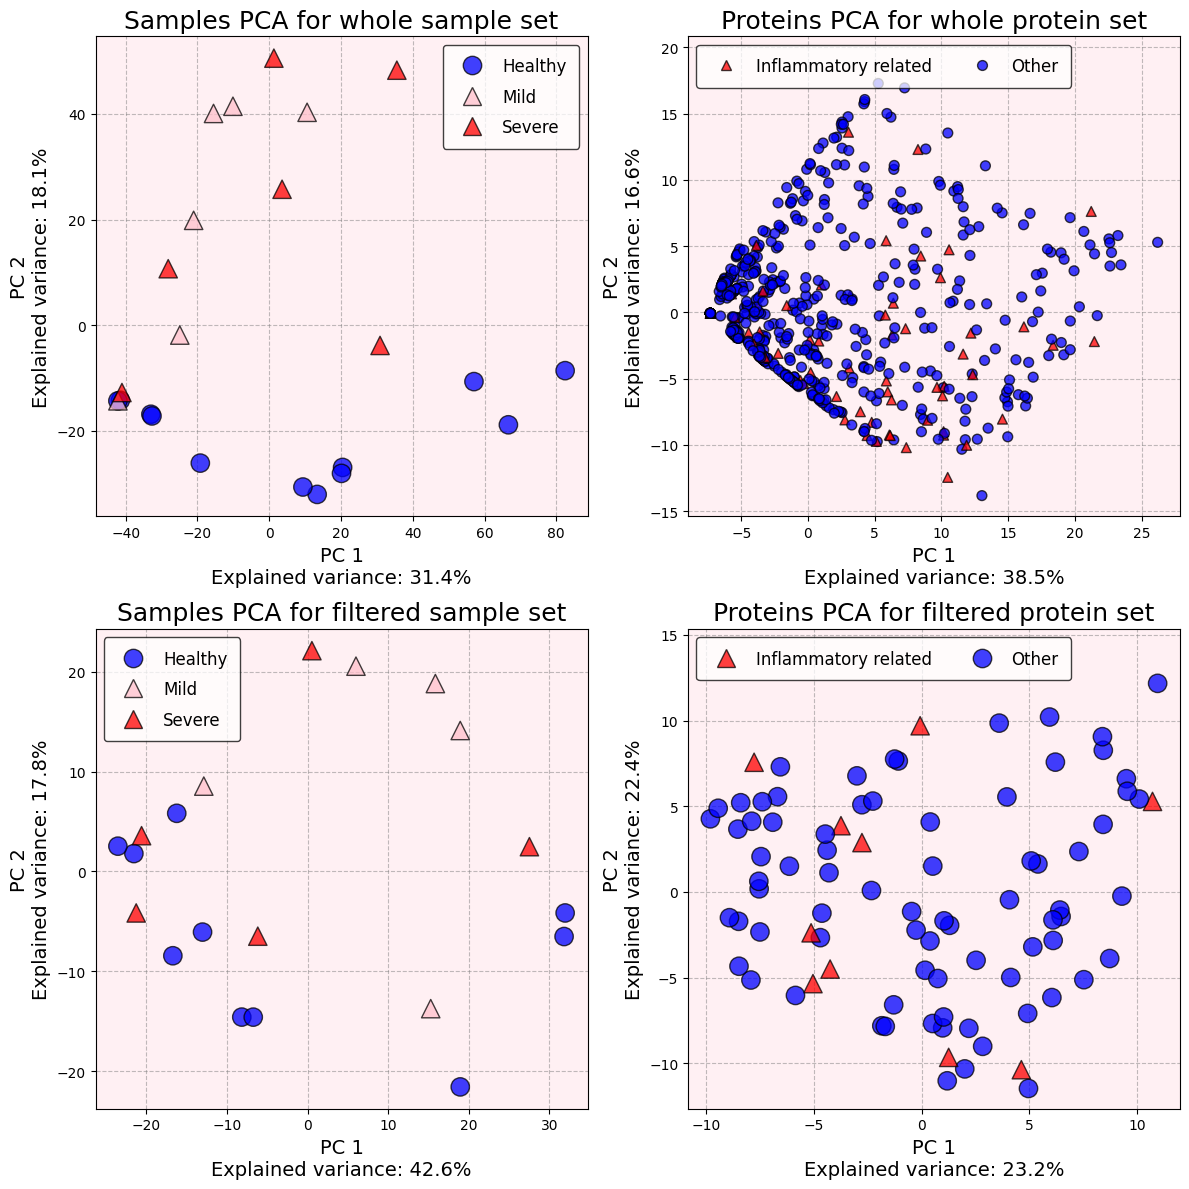

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

data = pd.read_csv("Data/raw_human.csv", index_col=0, header=[0, 1, 2])
inflammationProteins = pd.read_csv("Data/Olink_Inflammation_2.csv", sep=";")["UniProt ID"].to_list()

##################################################################################################################################

import matplotlib.patches as mpatches
from sklearn.decomposition import PCA


pca_input = np.log10(data.T + 1)

pca = PCA(n_components=2)
x_pca = pca.fit_transform(pca_input)

x_pca = pd.DataFrame(x_pca, index=pca_input.index, columns=[F"PC {i}" for i in range(1, pca.n_components + 1)]).reset_index()

axes[0, 0].set_title("Samples PCA for whole sample set", fontsize=18)

axes[0, 0].tick_params(axis='both', labelsize=10)

axes[0, 0].set_xlabel(f"PC 1\nExplained variance: {(pca.explained_variance_ratio_[0] * 100).round(1)}%", fontsize=14)
axes[0, 0].set_ylabel(f"PC 2\nExplained variance: {(pca.explained_variance_ratio_[1] * 100).round(1)}%", fontsize=14)

axes[0, 0].set_axisbelow(True)
axes[0, 0].grid(color='gray', linestyle='dashed', alpha=0.5)


scatter = sns.scatterplot(
    ax=axes[0, 0],
    data=x_pca,
    x="PC 1",
    y="PC 2",
    hue="Acuteness",
    style="Acuteness",
    alpha=0.75,
    hue_order=["Healthy", "Mild", "Severe"],
    palette=["blue", "pink", "red"],
    markers=["o", "^", "^"],
    edgecolor="black",
    linewidth=1,
    s=175
)


axes[0, 0].legend(
    loc="upper right",
    facecolor='white', 
    edgecolor="black",
    framealpha=0.75, 
    borderpad=0.75,
    labelspacing=0.75,
    fontsize=12
)

##################################################################################################################################

import matplotlib.patches as mpatches
import matplotlib.markers as marker

from scipy import stats
from sklearn.decomposition import PCA

pca_input = np.log10(data + 1)

pca = PCA(n_components=2)
xpca = pca.fit_transform(pca_input)

x_pca = pd.DataFrame(xpca, index=pca_input.index, columns=[F"PC {i}" for i in range(1, pca.n_components + 1)])

x_pca["type"] = x_pca.index.map(lambda x: "Inflammatory related" if x in inflammationProteins else "Other")


axes[0, 1].set_title("Proteins PCA for whole protein set", fontsize=18)

axes[0, 1].tick_params(axis='both', labelsize=10)

axes[0, 1].set_xlabel(f"PC 1\nExplained variance: {(pca.explained_variance_ratio_[0] * 100).round(1)}%", fontsize=14)
axes[0, 1].set_ylabel(f"PC 2\nExplained variance: {(pca.explained_variance_ratio_[1] * 100).round(1)}%", fontsize=14)

axes[0, 1].set_axisbelow(True)
axes[0, 1].grid(color='gray', linestyle='dashed', alpha=0.5)


scatter = sns.scatterplot(
    ax=axes[0, 1],
    data=x_pca,
    x="PC 1",
    y="PC 2",
    hue="type",
    style="type",
    alpha=0.75,
    hue_order=["Inflammatory related", "Other"],
    palette=["red", "blue"],
    markers=["o", "^"],
    edgecolor="black",
    linewidth=1,
    s=50
    
)

        
axes[0, 1].legend(
    ncol=2,
    loc="upper left",
    facecolor='white', 
    edgecolor="black",
    framealpha=0.75, 
    borderpad=0.75,
    labelspacing=0.75,
    fontsize=12
)

lims = list(axes[0, 1].get_ylim())
lims[1] += 2
axes[0, 1].set_ylim(lims)

##################################################################################################################################

data = pd.read_csv("Data/smears_imputed.csv", index_col=0, header=[0, 1, 2])
inflammationProteins = pd.read_csv("Data/Olink_Inflammation_2.csv", sep=";")["UniProt ID"].to_list()

##################################################################################################################################

import matplotlib.patches as mpatches
from sklearn.decomposition import PCA


pca_input = np.log10(data.T + 1)

pca = PCA(n_components=2)
x_pca = pca.fit_transform(pca_input)

x_pca = pd.DataFrame(x_pca, index=pca_input.index, columns=[F"PC {i}" for i in range(1, pca.n_components + 1)]).reset_index()

axes[1, 0].set_title("Samples PCA for filtered sample set", fontsize=18)

axes[1, 0].tick_params(axis='both', labelsize=10)

axes[1, 0].set_xlabel(f"PC 1\nExplained variance: {(pca.explained_variance_ratio_[0] * 100).round(1)}%", fontsize=14)
axes[1, 0].set_ylabel(f"PC 2\nExplained variance: {(pca.explained_variance_ratio_[1] * 100).round(1)}%", fontsize=14)

axes[1, 0].set_axisbelow(True)
axes[1, 0].grid(color='gray', linestyle='dashed', alpha=0.5)


scatter = sns.scatterplot(
    ax=axes[1, 0],
    data=x_pca,
    x="PC 1",
    y="PC 2",
    hue="Acuteness",
    style="Acuteness",
    alpha=0.75,
    hue_order=["Healthy", "Mild", "Severe"],
    palette=["blue", "pink", "red"],
    markers=["o", "^", "^"],
    edgecolor="black",
    linewidth=1,
    s=175
)


axes[1, 0].legend(
    loc="upper left",
    facecolor='white', 
    edgecolor="black",
    framealpha=0.75, 
    borderpad=0.75,
    labelspacing=0.75,
    fontsize=12
)

##################################################################################################################################

import matplotlib.patches as mpatches
import matplotlib.markers as marker

from scipy import stats
from sklearn.decomposition import PCA

pca_input = np.log10(data + 1)

pca = PCA(n_components=2)
xpca = pca.fit_transform(pca_input)

x_pca = pd.DataFrame(xpca, index=pca_input.index, columns=[F"PC {i}" for i in range(1, pca.n_components + 1)])

x_pca["type"] = x_pca.index.map(lambda x: "Inflammatory related" if x in inflammationProteins else "Other")


axes[1, 1].set_title("Proteins PCA for filtered protein set", fontsize=18)

axes[1, 1].tick_params(axis='both', labelsize=10)

axes[1, 1].set_xlabel(f"PC 1\nExplained variance: {(pca.explained_variance_ratio_[0] * 100).round(1)}%", fontsize=14)
axes[1, 1].set_ylabel(f"PC 2\nExplained variance: {(pca.explained_variance_ratio_[1] * 100).round(1)}%", fontsize=14)

axes[1, 1].set_axisbelow(True)
axes[1, 1].grid(color='gray', linestyle='dashed', alpha=0.5)


scatter = sns.scatterplot(
    ax=axes[1, 1],
    data=x_pca,
    x="PC 1",
    y="PC 2",
    hue="type",
    style="type",
    alpha=0.75,
    hue_order=["Inflammatory related", "Other"],
    palette=["red", "blue"],
    markers=["o", "^"],
    edgecolor="black",
    linewidth=1,
    s=175
    
)

        
axes[1, 1].legend(
    ncol=2,
    loc="upper left",
    facecolor='white', 
    edgecolor="black",
    framealpha=0.75, 
    borderpad=0.75,
    labelspacing=0.75,
    fontsize=12
)

lims = list(axes[1, 1].get_ylim())
lims[1] += 2
axes[1, 1].set_ylim(lims)

fig.tight_layout()
fig.savefig("Plots/PCAs.png", bbox_inches="tight", dpi=300)